In [9]:
import pandas as pd

# Step 1: Load dataset with tab separator
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\marketing_campaign.csv", sep="\t")

# Show first 5 rows
print(df.head())

# Show dataset info
print(df.info())


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [10]:
# Step 2: Feature Selection & Cleaning

# Missing income values hata diye
df = df.dropna(subset=['Income'])

# Har customer ka total spending calculate kiya (wines, fruits, meat, fish, sweets, gold)
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                           'MntFishProducts', 'MntSweetProducts', 
                           'MntGoldProds']].sum(axis=1)

# Clustering ke liye sirf income aur total spending rakha
X = df[['Income', 'Total_Spending']]

# Thoda sa data dekh lete hain
print(X.head())


    Income  Total_Spending
0  58138.0            1617
1  46344.0              27
2  71613.0             776
3  26646.0              53
4  58293.0             422


In [11]:
# Step 3: Scaling

from sklearn.preprocessing import StandardScaler

# Scaling kiya income aur spending ko
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Pehle 5 rows check kar lete hain
print(X_scaled[:5])


[[ 0.2340627   1.67548812]
 [-0.23455948 -0.96235832]
 [ 0.76947764  0.28024985]
 [-1.01723878 -0.91922372]
 [ 0.24022146 -0.30704427]]


In [12]:
# Step 4: Clustering (KMeans)

from sklearn.cluster import KMeans

# 4 clusters try kar rahe hain
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Har cluster ka thoda summary dekhte hain
print(df.groupby('Cluster')[['Income', 'Total_Spending']].mean())


                Income  Total_Spending
Cluster                               
0         34965.902203      129.317181
1         78467.276995     1596.117371
2         64220.006116      792.807339
3        666666.000000       62.000000


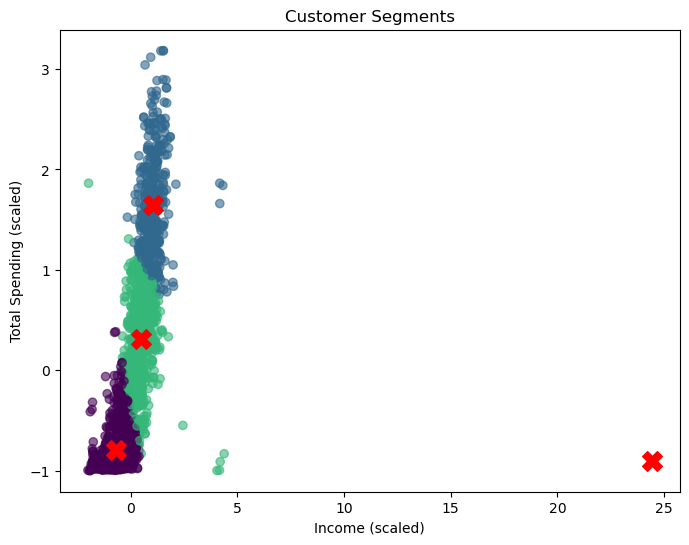

In [13]:
# Step 5: Visualization

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Cluster points plot kar diye
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=df['Cluster'], cmap='viridis', alpha=0.6)

# Cluster centers plot kar diye (red color)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, marker='X')

plt.xlabel("Income (scaled)")
plt.ylabel("Total Spending (scaled)")
plt.title("Customer Segments")
plt.show()


In [15]:
print(df.columns)



Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Total_Spending', 'Cluster'],
      dtype='object')


In [16]:
# Group by Cluster and calculate average Income & Total Spending
cluster_summary = df.groupby('Cluster')[['Income', 'Total_Spending']].mean().round(2)

# Display insights for each cluster
for cluster in cluster_summary.index:
    income = cluster_summary.loc[cluster, 'Income']
    spending = cluster_summary.loc[cluster, 'Total_Spending']

    print(f"\n🔹 Cluster {cluster}")
    print(f"Average Income: {income}")
    print(f"Average Total Spending: {spending}")

    # Simple, student-style explanation based on values
    if income >= 70000 and spending >= 800:
        print("→ High income, high spending: Likely luxury or premium customers.")
    elif income <= 30000 and spending <= 400:
        print("→ Low income, low spending: Budget-conscious or inactive customers.")
    elif income >= 60000 and spending <= 400:
        print("→ High income, low spending: Cautious or conservative spenders.")
    elif income <= 30000 and spending >= 700:
        print("→ Low income, high spending: Possibly impulsive or aspirational buyers.")
    else:
        print("→ Medium income/spending: Balanced or average customers.")



🔹 Cluster 0
Average Income: 34965.9
Average Total Spending: 129.32
→ Medium income/spending: Balanced or average customers.

🔹 Cluster 1
Average Income: 78467.28
Average Total Spending: 1596.12
→ High income, high spending: Likely luxury or premium customers.

🔹 Cluster 2
Average Income: 64220.01
Average Total Spending: 792.81
→ Medium income/spending: Balanced or average customers.

🔹 Cluster 3
Average Income: 666666.0
Average Total Spending: 62.0
→ High income, low spending: Cautious or conservative spenders.


In [19]:
# Cluster-wise detailed statistics for Income and Total Spending
cluster_details = df.groupby('Cluster')[['Income', 'Total_Spending']].agg(['mean', 'min', 'max']).round(1)

print("Cluster-wise Income and Spending statistics:\n")
print(cluster_details)



Cluster-wise Income and Spending statistics:

           Income                     Total_Spending            
             mean       min       max           mean   min   max
Cluster                                                         
0         34965.9    1730.0   61923.0          129.3     5   839
1         78467.3   48192.0  160803.0         1596.1  1062  2525
2         64220.0    2447.0  162397.0          792.8     6  1730
3        666666.0  666666.0  666666.0           62.0    62    62


In [20]:
from sklearn.cluster import DBSCAN

# DBSCAN clustering apply karo scaled data pe
db = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = db.fit_predict(X_scaled)

# Har cluster me kitne customers hain dekhte hain
print("DBSCAN cluster counts:\n")
print(df['DBSCAN_Cluster'].value_counts())


DBSCAN cluster counts:

DBSCAN_Cluster
 0    2206
-1      10
Name: count, dtype: int64
